# UQ MATH2504: Project 3

My soltion to UQ MATH2504 Project 3: Analysis of Datasets and Basic ML Experiments <br><br>
By Joshua Crook S#: 46974408<br>
repo: https://github.com/joshuacrook400/Joshua-Crook-2504-2022-PROJECT3

## Task 1:  Housing Prices Data

In [2]:
using Plots, StatsPlots, StatsBase, Statistics
include("src/MelbourneHousing.jl");
first(df, 5)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date
,String31,String31,Int64,String1,Int64?,String3,String31,String15
1,Abbotsford,68 Studley St,2,h,missing,SS,Jellis,3/09/2016
2,Abbotsford,85 Turner St,2,h,1480000,S,Biggin,3/12/2016
3,Abbotsford,25 Bloomburg St,2,h,1035000,S,Biggin,4/02/2016
4,Abbotsford,18/659 Victoria St,3,u,missing,VB,Rounds,4/02/2016
5,Abbotsford,5 Charles St,3,h,1465000,SP,Biggin,4/03/2017


### Task 1.1: Exploratory data of single variables

Comparing Price and number of rooms.

In [3]:
df_price = copy(df)
dropmissing!(df_price, :Price);

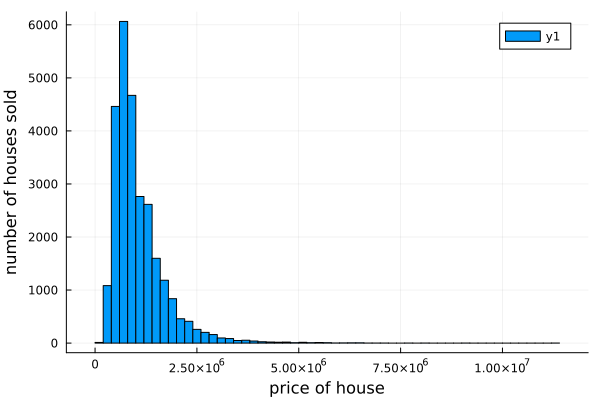

In [3]:
histogram(df_price.Price, nbins = 100, xlabel = "price of house", ylabel = "number of houses sold")

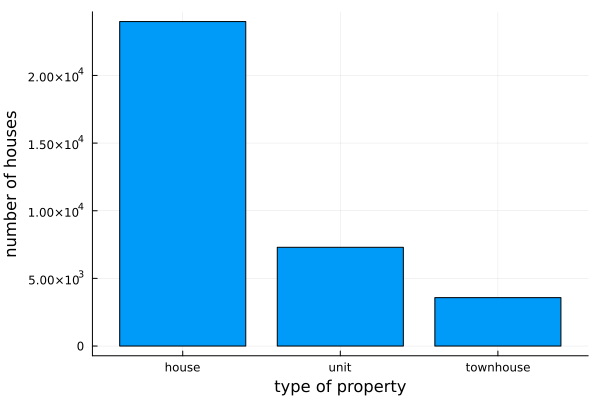

In [5]:
houses = []
push!(houses, size(filter(rows -> rows.Type == "h", df))[1])
push!(houses, size(filter(rows -> rows.Type == "u", df))[1])
push!(houses, size(filter(rows -> rows.Type == "t", df))[1])
label = ["house", "unit", "townhouse"]
bar(label, houses, label = false, xlabel = "type of property", ylabel = "number of houses")


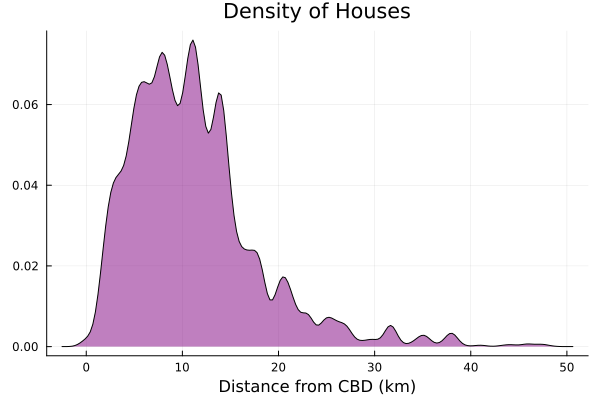

In [6]:
distance = dropmissing(df,:Distance).Distance
density(distance, label = false, title = "Density of Houses", xlabel = "Distance from CBD (km)", color = "black", fill = (0, 0.5, :purple))

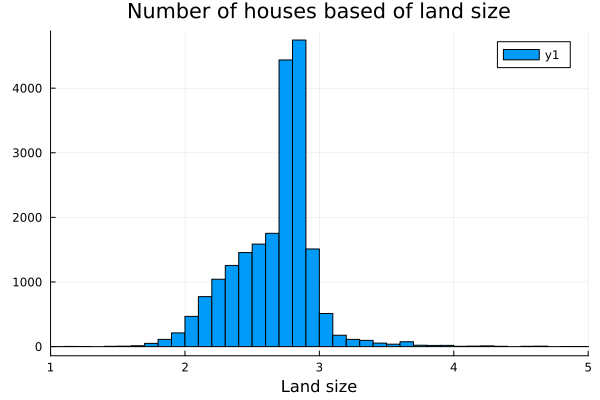

In [7]:
landsize = dropmissing(df,:Landsize).Landsize
deleteat!(landsize, findall(x -> x == 0,landsize))
landsizelog = map(x -> x == 0 ? x : log10(x), landsize)
histogram(landsizelog, nbins = 100, xlim = (1,5), title = "Number of houses based of land size", xlabel = "Land size")

The histogram above shows the number of houses base on land size in $m^2$. The x-axis is on a $\log_{10}$ scale. All units with no landsize were excluded from this plot.

### Task 1.2: Exploratory data analysis comparing variables

(16,)


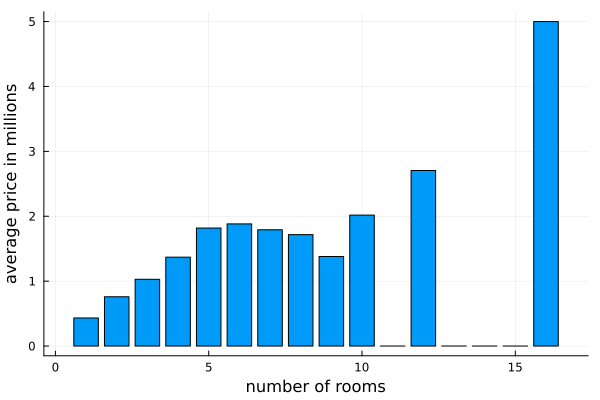

In [4]:
avg_price = [] 
for i in 1:16 
    avg = mean(df_price.Price[df_price.Rooms .== i]) / 1e6
    isnan(avg) ? push!(avg_price, 0) : push!(avg_price, avg) 
end
println(size(avg_price))
bar(avg_price,  xlabel = "number of rooms", ylabel = "average price in millions", legend = false)

### Task 1.3: Exploratory data analysis over time 

### Task 1.4: Linear Regression Models